In [2]:
# Import libraries
import pandas as pd
from skimpy import skim
import re
import nltk
from nltk.corpus import stopwords
from collections import  Counter
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
sns.set_theme(style="dark");

In [4]:
# Read post data
posts = pd.read_csv('../data/reddit_Cerave_posts_20241109_193458.csv')
posts.head()

,post_id,subreddit,flair,title,selftext,score,num_comments,created_utc,has_image,has_video,media_count,permalink
0,1gmkh7d,beauty,NaN,CeraVe moisturizing lotion and SA cleanser,Does CeraVe moisturizing lotion and SA cleanse...,0,4,2024-11-08 14:59:40,False,False,0,https://reddit.com/r/beauty/comments/1gmkh7d/c...
1,1gluia2,beauty,Discussion,Diluting moisturizer for better absorption and...,"Usually I use CeraVe, but I ve dabbled with ot...",0,1,2024-11-07 16:29:47,False,False,0,https://reddit.com/r/beauty/comments/1gluia2/d...
2,1glu6la,beauty,Seeking Advice,Help with skincare routine for a guy,"Hi, Recently, I ve been considering expanding ...",0,0,2024-11-07 16:16:04,False,False,0,https://reddit.com/r/beauty/comments/1glu6la/h...
3,1gkk58i,beauty,NaN,What skincare routine after 30?,Hello everyone! I hope I m posting in the righ...,1,3,2024-11-05 23:08:15,False,False,0,https://reddit.com/r/beauty/comments/1gkk58i/w...
4,1giam4n,beauty,NaN,What s your step by step facial night time rou...,What s work for your face from cleanser to moi...,8,20,2024-11-03 00:23:47,False,False,0,https://reddit.com/r/beauty/comments/1giam4n/w...


In [6]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   post_id       413 non-null    object
 1   subreddit     413 non-null    object
 2   flair         338 non-null    object
 3   title         413 non-null    object
 4   selftext      409 non-null    object
 5   score         413 non-null    int64 
 6   num_comments  413 non-null    int64 
 7   created_utc   413 non-null    object
 8   has_image     413 non-null    bool  
 9   has_video     413 non-null    bool  
 10  media_count   413 non-null    int64 
 11  permalink     413 non-null    object
dtypes: bool(2), int64(3), object(7)
memory usage: 33.2+ KB


In [7]:
skim(posts)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 413    │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 12     │ │ int64       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ bool        │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %    ┃ mean     ┃ sd       ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ score              │    0 │       0 │    6.019 │    22.34 │    0 │     1 │     2 │     3 │   266 │    ▇    │  │
│ │ num_comments       │    0 │       0 │    10.62 │    24.32 │    0 │     2 │     4 │    10 │   365 │    ▇    │  │
│ │ media_count        │    0 │       0 │    0.707 │    1.269 │    0 │     0 │     0 │     1 │    10 │   ▇▁    │  │
│ └────────────────────┴──────┴─────────┴──────────┴──────────┴──────┴───────┴───────┴───────┴───────┴─────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ true            ┃ true rate                     ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ has_image                          │             148 │                          0.36 │       ▇    ▅        │  │
│ │ has_video                          │               0 │                             0 │           ▇         │  │
│ └────────────────────────────────────┴─────────────────┴───────────────────────────────┴─────────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA     ┃ NA %         ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ post_id                  │      0 │            0 │                            1 │                      413 │  │
│ │ subreddit                │      0 │            0 │                            1 │                      413 │  │
│ │ flair                    │     75 │        18.16 │                          1.5 │                      634 │  │
│ │ title                    │      0 │            0 │                          8.4 │                     3479 │  │
│ │ selftext                 │      4 │         0.97 │                          160 │                    64345 │  │
│ │ created_utc              │      0 │            0 │                            2 │                      826 │  │
│ │ permalink                │      0 │            0 │  

In [8]:
# Some cleaning
posts[['selftext', 'flair']] = posts[['selftext', 'flair']].fillna('')
posts = posts.drop('has_video', axis=1)

In [9]:
posts['subreddit'].value_counts()

subreddit
SkincareAddiction      118
SkincareAddictionUK    102
SkincareAddicts         68
Skincare_Addiction      60
30PlusSkinCare          56
beauty                   9
Name: count, dtype: int64

In [10]:
print(posts['created_utc'].min())
print(posts['created_utc'].max())

2024-04-07 16:40:04
2024-11-09 18:08:36


In [16]:
# Group by subreddit and aggregate count and mean score
subreddit_stats = posts.groupby('subreddit').agg(
    number_of_posts=('score', 'count'),
    avg_score=('score', 'mean'),
    avg_comments=('num_comments', 'mean')
).reset_index().sort_values(by='avg_score', ascending=False)

print(subreddit_stats)

             subreddit  number_of_posts  avg_score  avg_comments
0       30PlusSkinCare               56  10.446429     13.267857
2  SkincareAddictionUK              102   8.127451     13.156863
4   Skincare_Addiction               60   5.166667     11.233333
3      SkincareAddicts               68   4.485294     10.764706
1    SkincareAddiction              118   3.728814      7.211864
5               beauty                9   1.888889      4.777778


In [13]:
correlation = subreddit_stats.number_of_posts.corr(subreddit_stats.avg_score)
print(f'Correlation between number of posts and average scores: {correlation}')

Correlation between number of posts and average scores: 0.2619873034676724


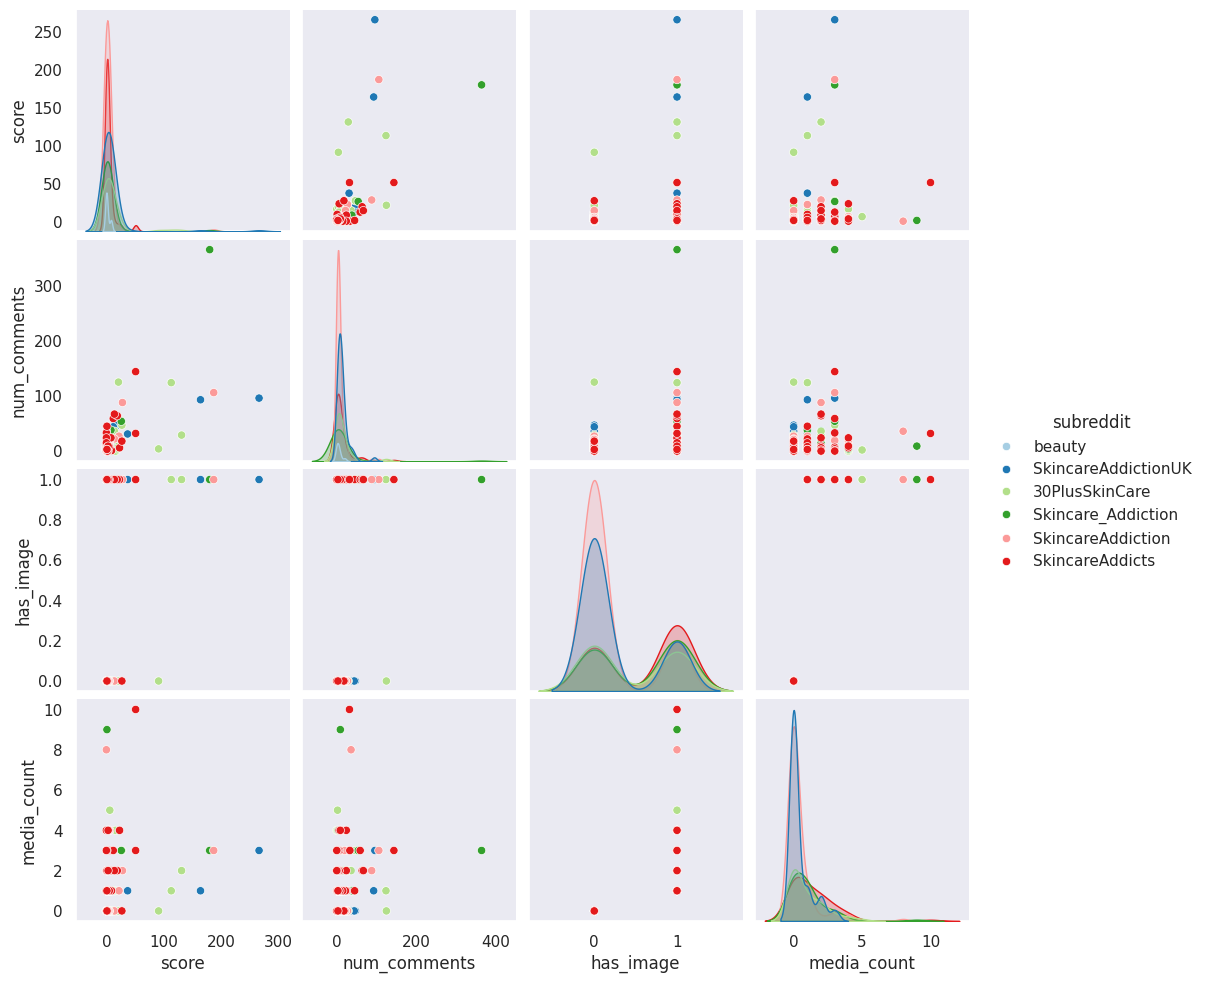

In [14]:
sns.pairplot(posts, hue='subreddit', palette='Paired');

In [17]:
# Group by 'has_image' and calculate mean and median scores
image_score_stats = posts.groupby('has_image')['score'].agg(['mean', 'median'])
print("Score Statistics based on Image Availability:\n", image_score_stats)

Score Statistics based on Image Availability:
                 mean  median
has_image                   
False       2.724528     2.0
True       11.918919     2.0


The higher mean sxore for posts with images imply a positive correlation between image presence and higher post scores.

In [19]:
# Group by 'media_count' and calculate mean and median scores
media_score_stats = posts.groupby('media_count')['score'].agg(['mean', 'median','count'])
print("Score Statistics based on Media Count:\n", media_score_stats)

Score Statistics based on Media Count:
                   mean  median  count
media_count                          
0             2.724528     2.0    265
1             7.430556     2.0     72
2             8.789474     3.0     38
3            32.333333     2.0     24
4             6.100000     3.5     10
5             6.000000     6.0      1
8             0.000000     0.0      1
9             1.000000     1.0      1
10           51.000000    51.0      1


Creating content that includes 2-3 media elements yields the highest levels of engagement. However, exceeding this number may lead to reduced returns.

In [55]:
def plot_top_ngrams_barchart(text, n=2):
    stop_words = set(stopwords.words('english'))
    
     # Handle input types
    if isinstance(text, str):
        text = pd.Series([text])
    elif not isinstance(text, pd.Series):
        text = pd.Series(text)

    new = text.str.split().values.tolist()
    corpus = [word for sublist in new for word in sublist if word.lower() not in stop_words]

    corpus = [" ".join(corpus)]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams = _get_top_ngram(corpus, n)
    x, y = map(list, zip(*top_n_bigrams))
    sns.barplot(x=y, y=x, palette='Paired', hue=y)

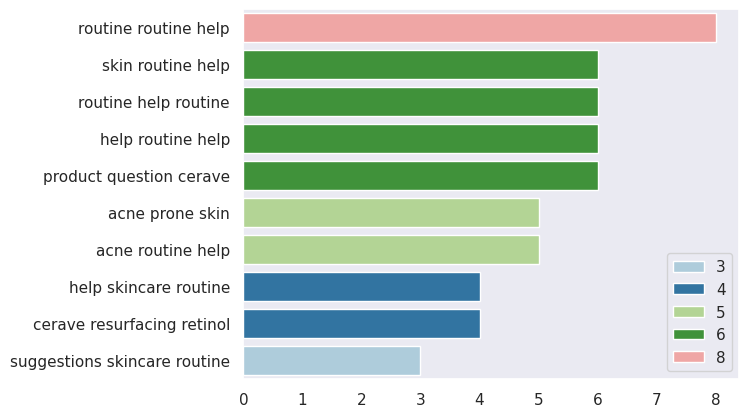

In [56]:
plot_top_ngrams_barchart(posts['title'], 3)

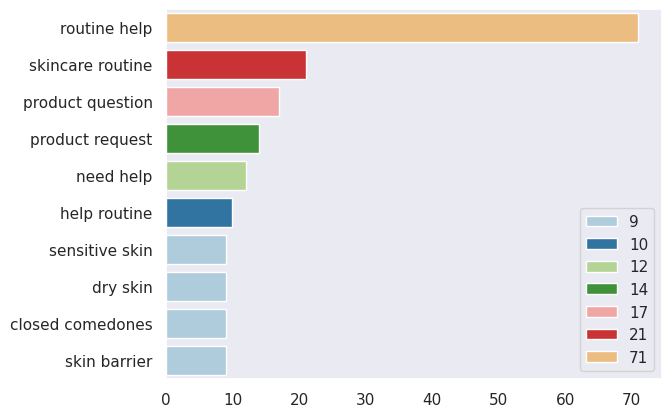

In [57]:
plot_top_ngrams_barchart(posts['title'], 2)

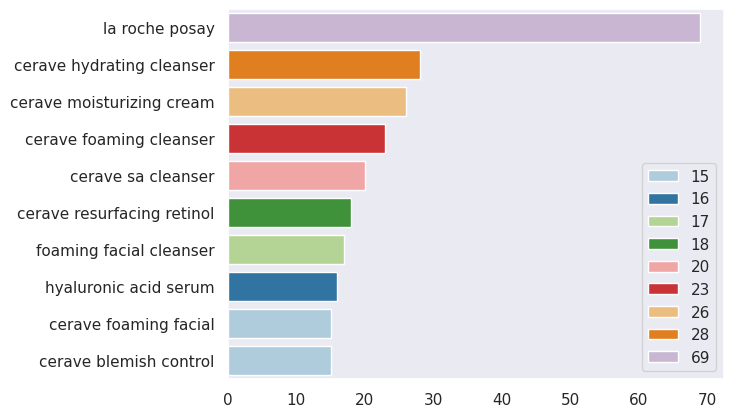

In [58]:
plot_top_ngrams_barchart(posts['selftext'], 3)

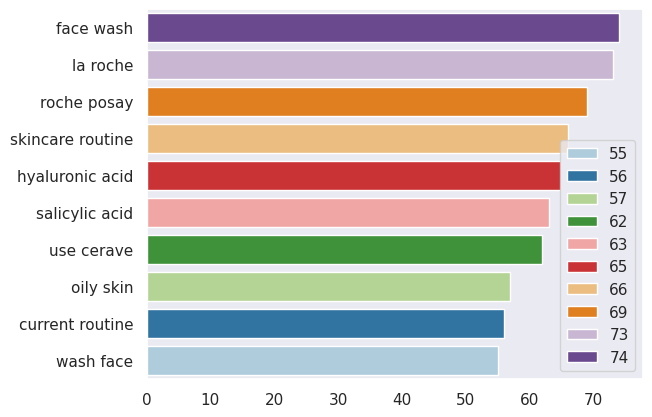

In [27]:
plot_top_ngrams_barchart(posts['selftext'], 2)

#### **WordClouds**

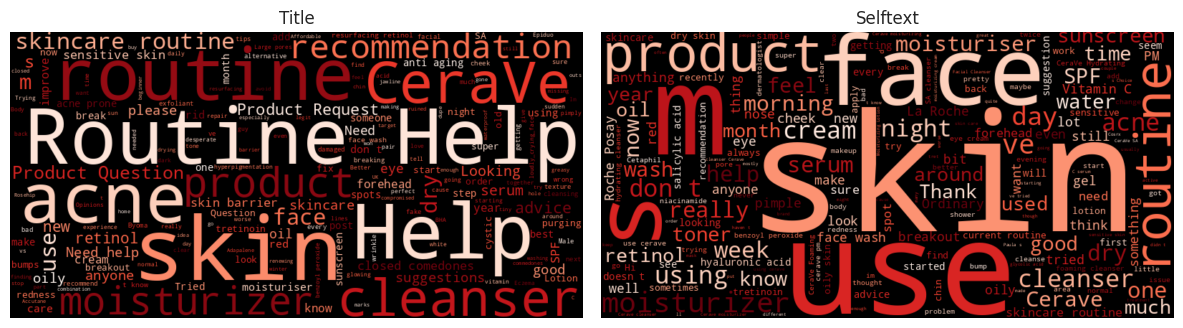

In [30]:
# Generate world clouds 
title = ' '.join(posts['title'])
selftext = ' '.join(posts['selftext'])

wordcloud1 = WordCloud(width=800, height=400, background_color='Black', colormap='Reds').generate(title)
wordcloud2 = WordCloud(width=800, height=400, background_color='Black', colormap='Reds').generate(selftext)

# Plot word clouds
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title('Title')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.title('Selftext')
plt.axis('off')

plt.tight_layout()

### **Engagement Insights**

In [31]:
# Convert 'created_utc' to datetime
posts['created_utc'] = pd.to_datetime(posts['created_utc'])

# Extract time components
posts['hour'] = posts['created_utc'].dt.hour
posts['day_of_week'] = posts['created_utc'].dt.day_name()

In [32]:
# Define day order for plots
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [33]:
# Calculate metrics
hourly_metrics = posts.groupby(['hour', 'subreddit']).agg({
    'score': 'mean',
    'num_comments': 'mean'}).round(2).reset_index()

daily_metrics = posts.groupby(['day_of_week', 'subreddit']).agg({
    'score': 'mean',
    'num_comments': 'mean'}).round(2).reset_index()

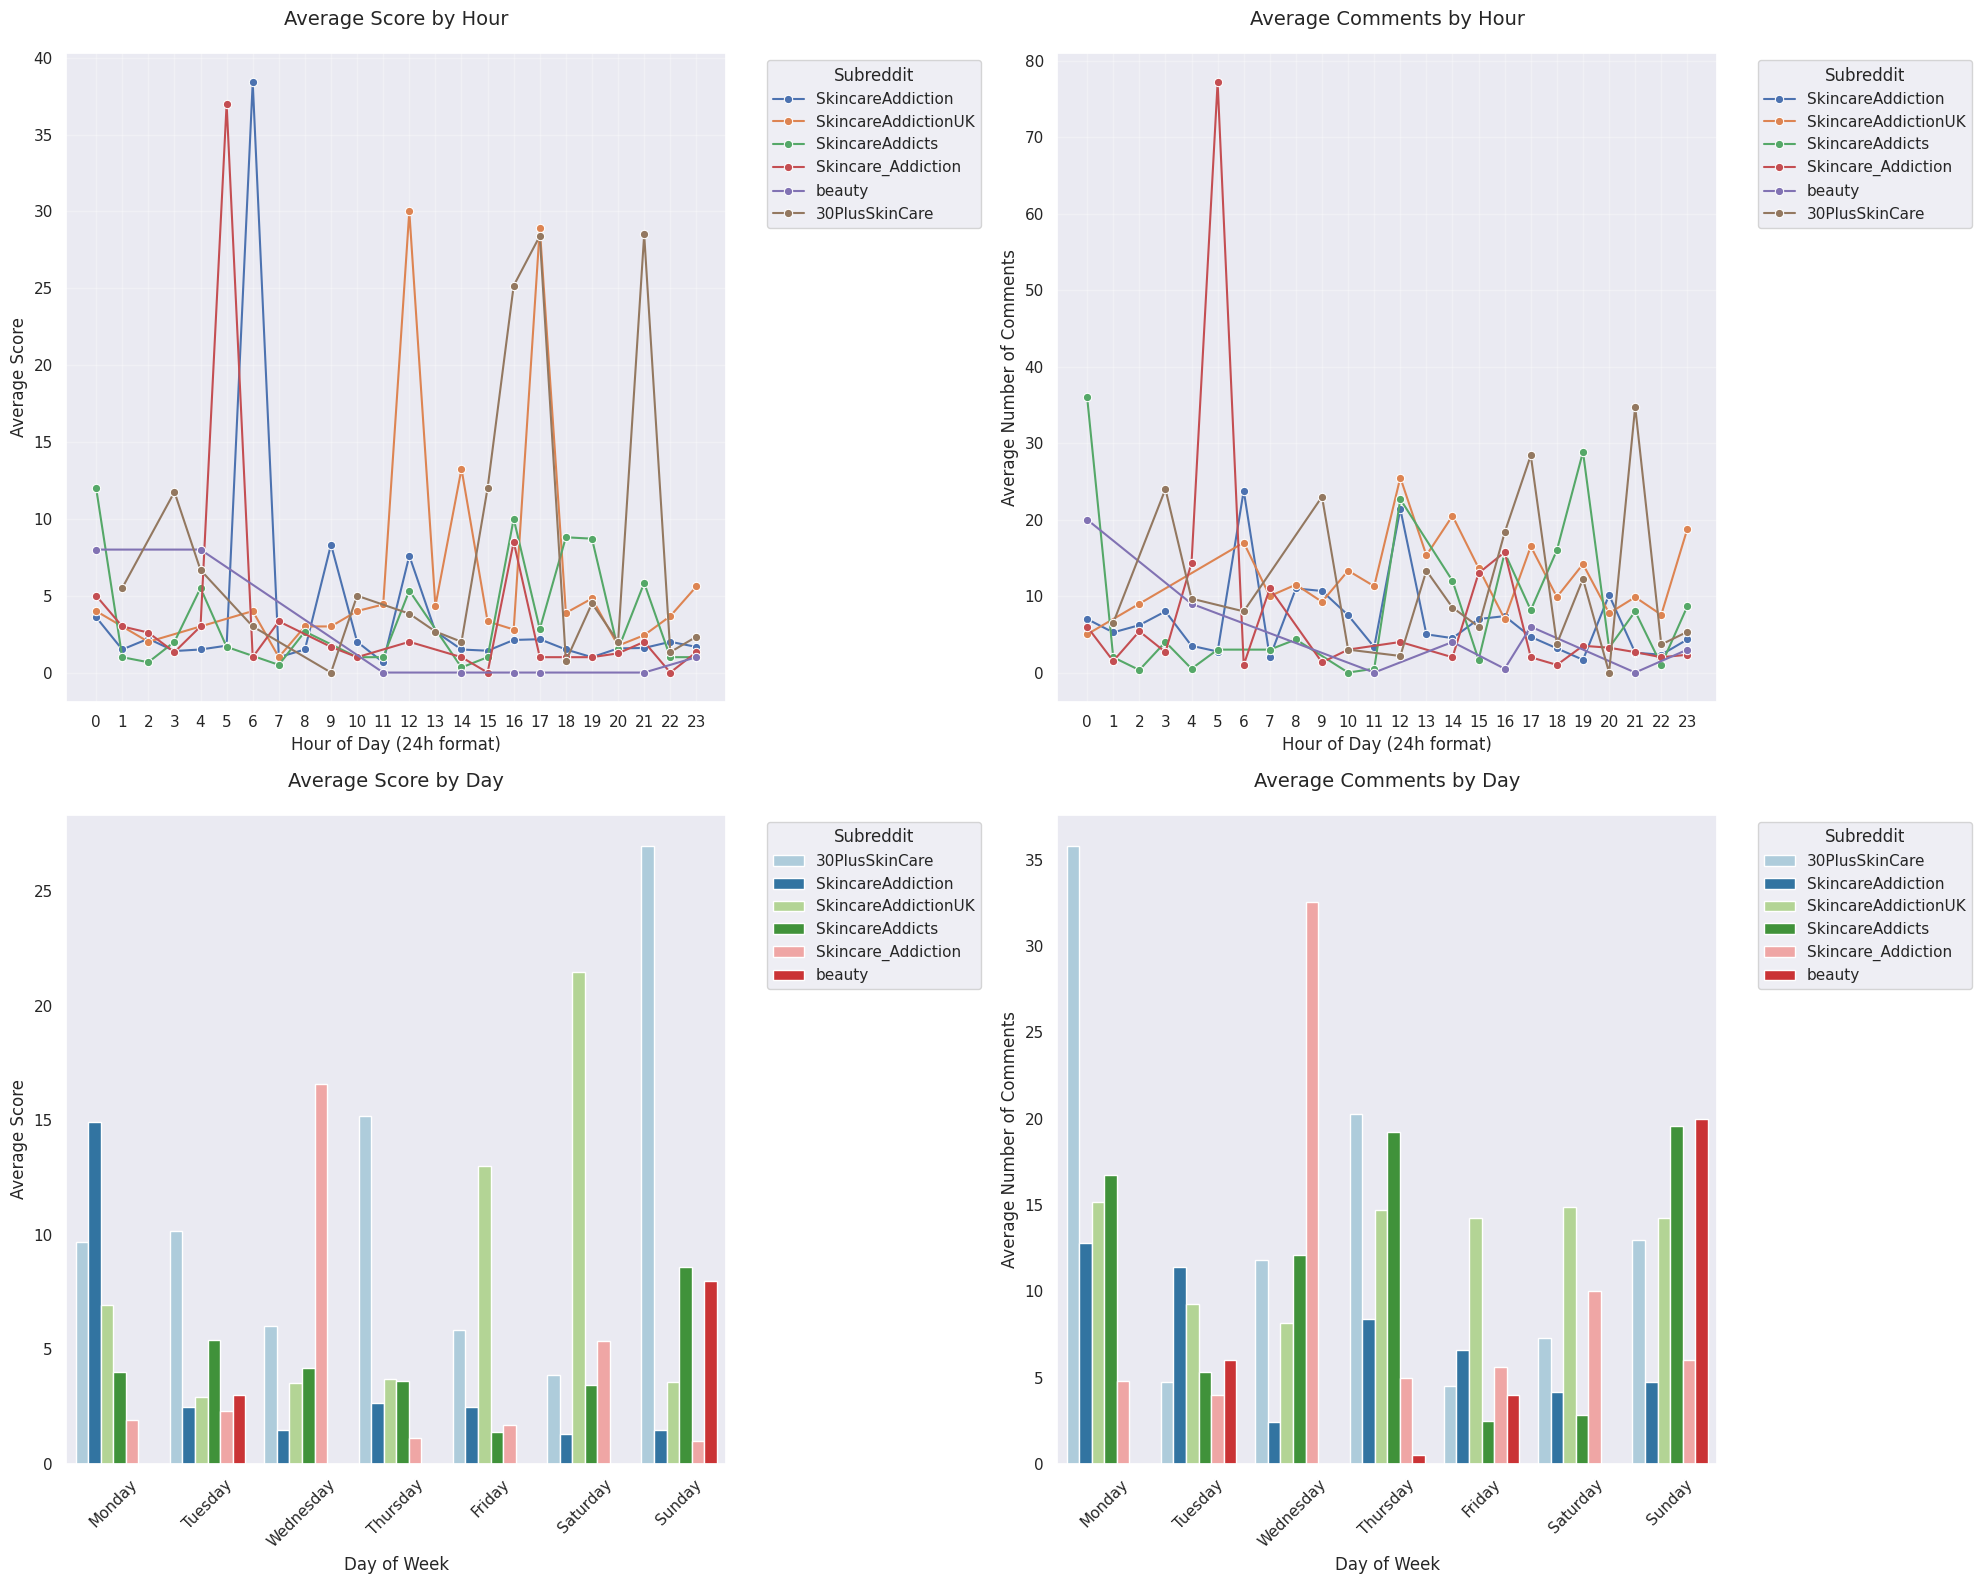

In [34]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# Hourly patterns - Scores
sns.lineplot(data=hourly_metrics, x='hour', y='score', 
            hue='subreddit', marker='o', ax=ax1)
ax1.set_title('Average Score by Hour', fontsize=14, pad=20)
ax1.set_xlabel('Hour of Day (24h format)')
ax1.set_ylabel('Average Score')
ax1.set_xticks(range(0, 24))
ax1.grid(True, alpha=0.3)
ax1.legend(title='Subreddit', bbox_to_anchor=(1.05, 1), loc='upper left')

# Hourly patterns - Comments
sns.lineplot(data=hourly_metrics, x='hour', y='num_comments', 
            hue='subreddit', marker='o', ax=ax2)
ax2.set_title('Average Comments by Hour', fontsize=14, pad=20)
ax2.set_xlabel('Hour of Day (24h format)')
ax2.set_ylabel('Average Number of Comments')
ax2.set_xticks(range(0, 24))
ax2.grid(True, alpha=0.3)
ax2.legend(title='Subreddit', bbox_to_anchor=(1.05, 1), loc='upper left')

# Daily patterns - Scores
sns.barplot(data=daily_metrics, x='day_of_week', y='score', 
           hue='subreddit', ax=ax3, order=day_order, palette='Paired')
ax3.set_title('Average Score by Day', fontsize=14, pad=20)
ax3.set_xlabel('Day of Week')
ax3.set_ylabel('Average Score')
ax3.tick_params(axis='x', rotation=45)
ax3.legend(title='Subreddit', bbox_to_anchor=(1.05, 1), loc='upper left')

# Daily patterns - Comments
sns.barplot(data=daily_metrics, x='day_of_week', y='num_comments', 
           hue='subreddit', ax=ax4, order=day_order, palette='Paired')
ax4.set_title('Average Comments by Day', fontsize=14, pad=20)
ax4.set_xlabel('Day of Week')
ax4.set_ylabel('Average Number of Comments')
ax4.tick_params(axis='x', rotation=45)
ax4.legend(title='Subreddit', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

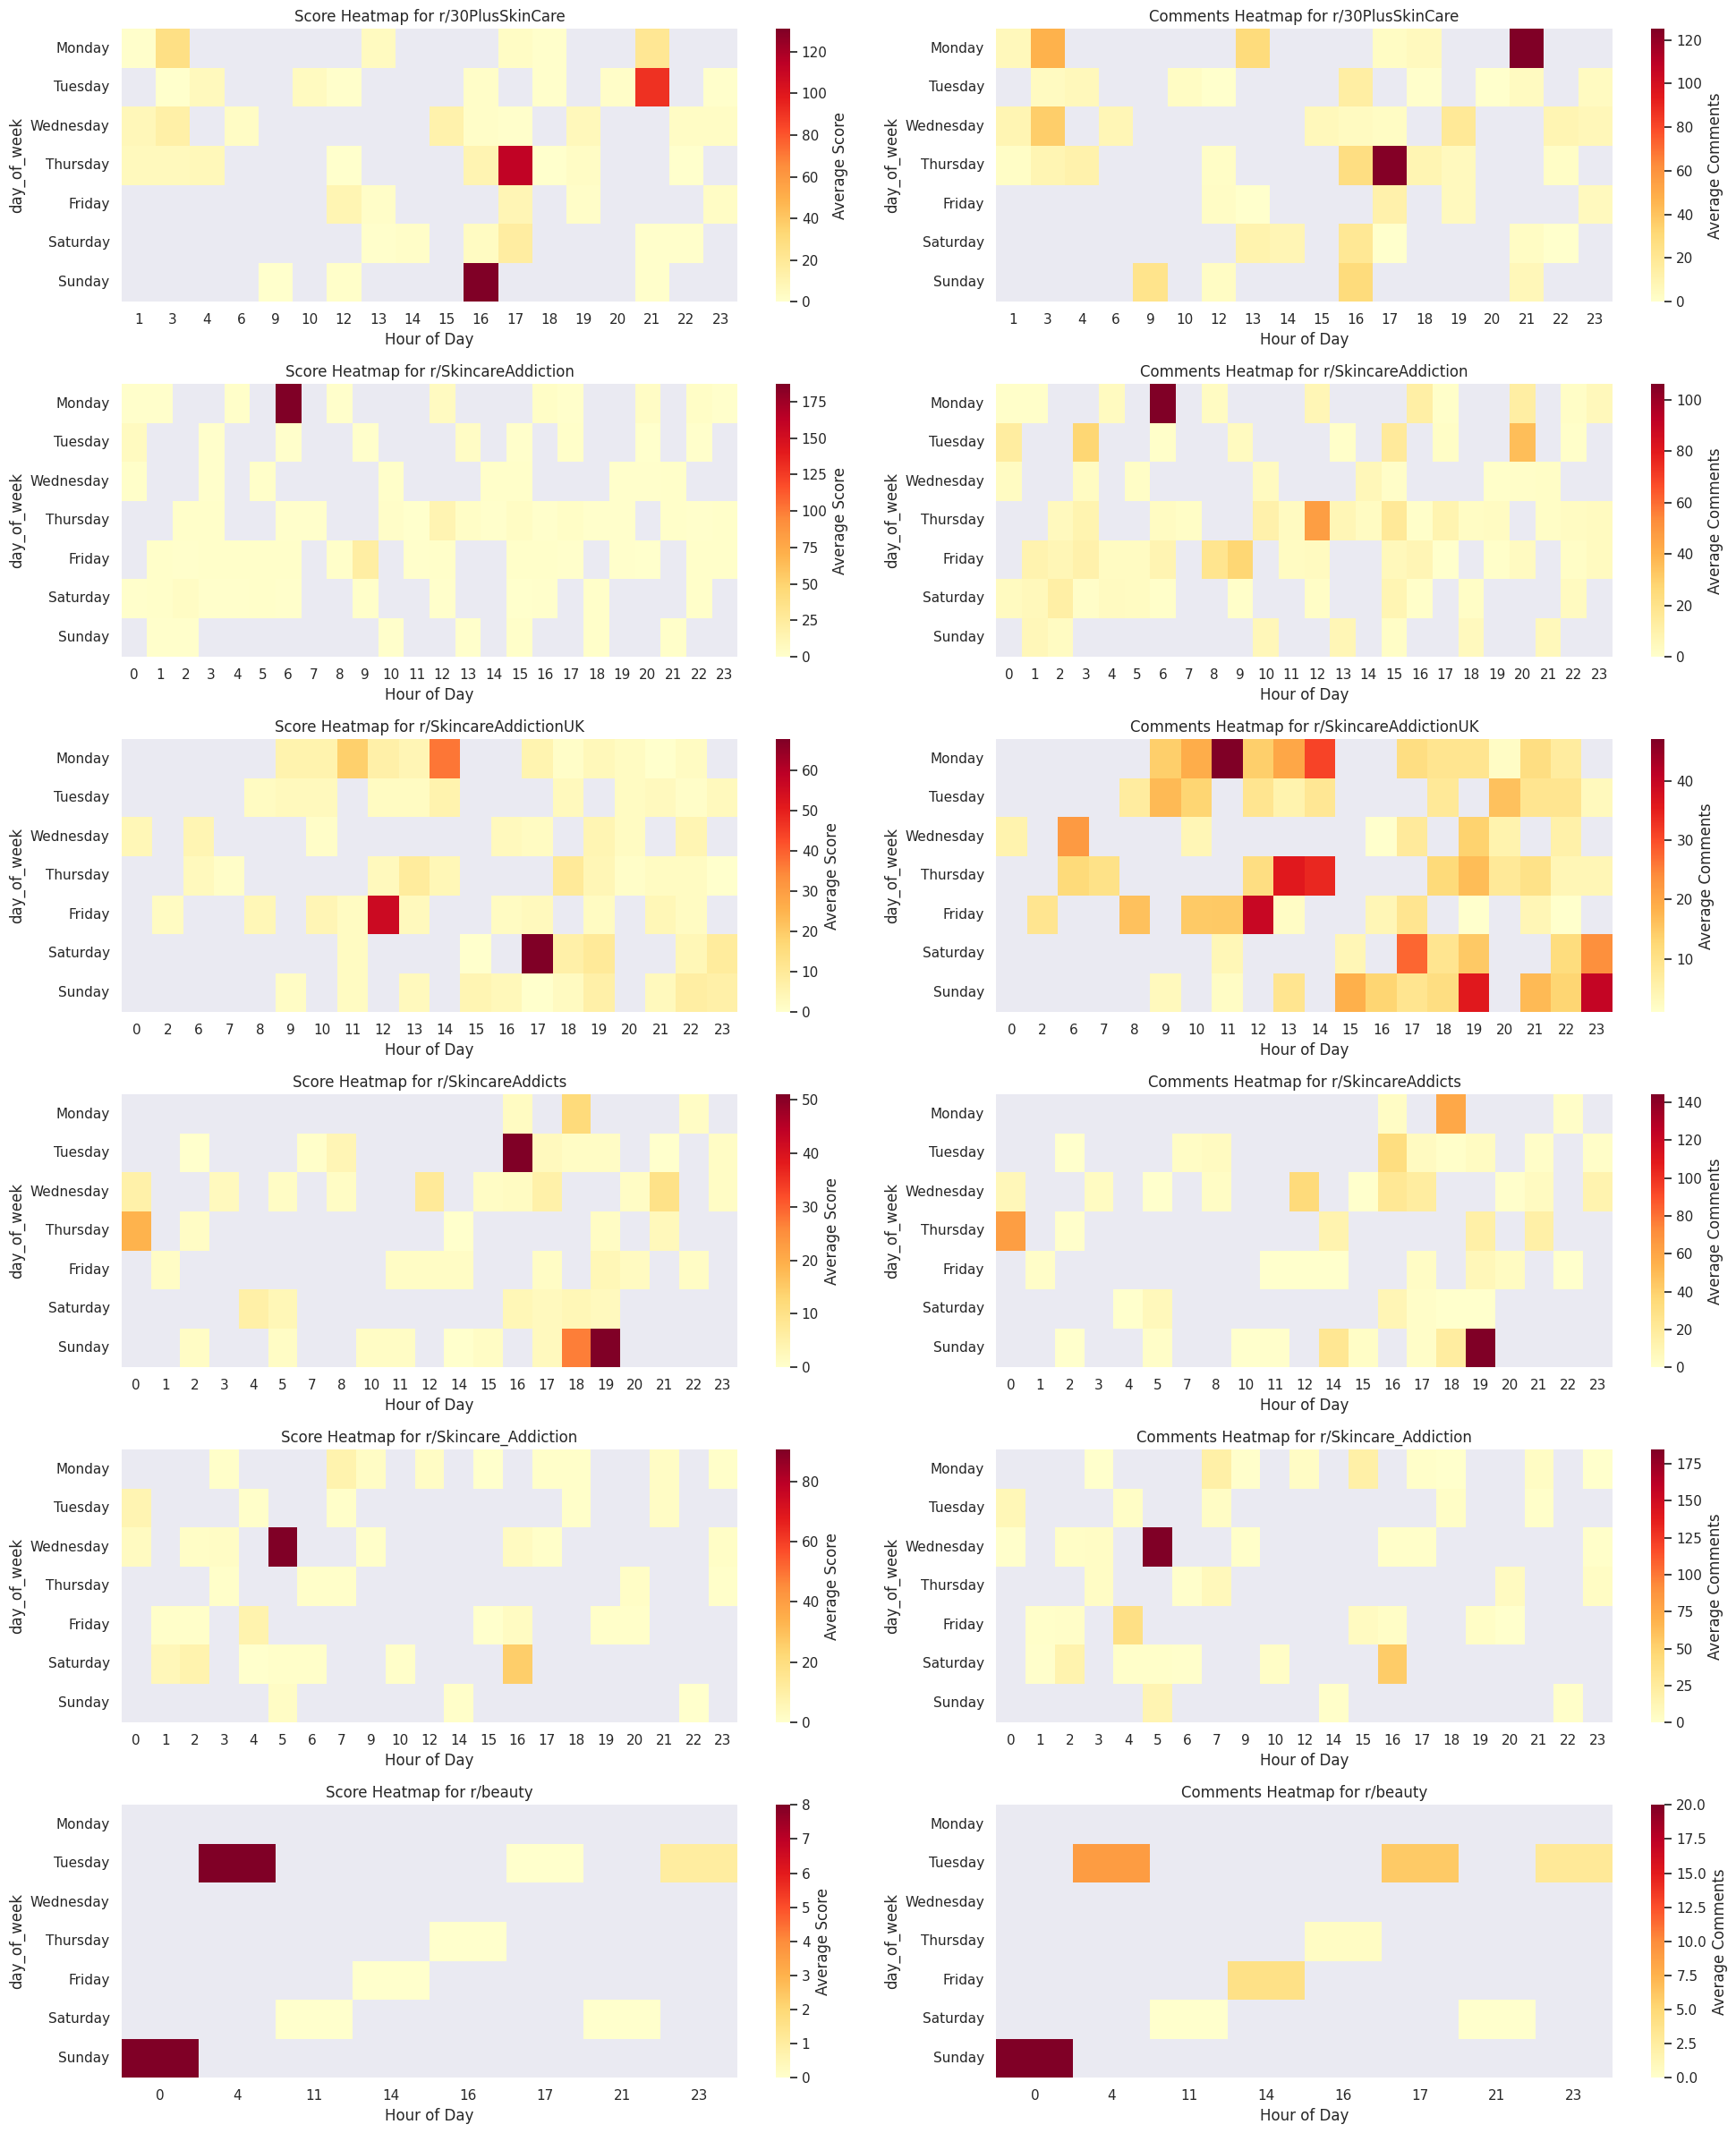

In [35]:
# Create heatmaps for both scores and comments
subreddits = sorted(posts['subreddit'].unique())
fig_heatmap, axs = plt.subplots(len(subreddits), 2, 
                               figsize=(20, 4*len(subreddits)))

# Convert to list if only one subreddit
if len(subreddits) == 1:
    axs = [axs]

for idx, subreddit in enumerate(subreddits):
    subreddit_data = posts[posts['subreddit'] == subreddit]
    
    # Score heatmap
    score_pivot = subreddit_data.pivot_table(
        values='score',
        index='day_of_week',
        columns='hour',
        aggfunc='mean'
    ).reindex(day_order)
    
    sns.heatmap(score_pivot, cmap='YlOrRd', ax=axs[idx][0], 
               cbar_kws={'label': 'Average Score'})
    axs[idx][0].set_title(f'Score Heatmap for r/{subreddit}')
    axs[idx][0].set_xlabel('Hour of Day')
    
    # Comments heatmap
    comments_pivot = subreddit_data.pivot_table(
        values='num_comments',
        index='day_of_week',
        columns='hour',
        aggfunc='mean'
    ).reindex(day_order)
    
    sns.heatmap(comments_pivot, cmap='YlOrRd', ax=axs[idx][1], 
               cbar_kws={'label': 'Average Comments'})
    axs[idx][1].set_title(f'Comments Heatmap for r/{subreddit}')
    axs[idx][1].set_xlabel('Hour of Day')

plt.tight_layout()

In [36]:
# Print insights
print("\nSUBREDDIT ENGAGEMENT INSIGHTS:")
print("-" * 50)

for subreddit in subreddits:
    subreddit_data = posts[posts['subreddit'] == subreddit]
    
    # Calculate best times for scores
    hourly_score_avg = subreddit_data.groupby('hour')['score'].mean()
    daily_score_avg = subreddit_data.groupby('day_of_week')['score'].mean()
    
    # Calculate best times for comments
    hourly_comments_avg = subreddit_data.groupby('hour')['num_comments'].mean()
    daily_comments_avg = subreddit_data.groupby('day_of_week')['num_comments'].mean()
    
    print(f"\nr/{subreddit}:")
    print("\nScore Metrics:")
    print(f"Best hour for scores: {hourly_score_avg.idxmax()}:00 (Avg score: {hourly_score_avg.max():.1f})")
    print(f"Best day for scores: {daily_score_avg.idxmax()} (Avg score: {daily_score_avg.max():.1f})")
    print(f"Overall average score: {subreddit_data['score'].mean():.1f}")
    
    print("\nComment Metrics:")
    print(f"Best hour for comments: {hourly_comments_avg.idxmax()}:00 (Avg comments: {hourly_comments_avg.max():.1f})")
    print(f"Best day for comments: {daily_comments_avg.idxmax()} (Avg comments: {daily_comments_avg.max():.1f})")
    print(f"Overall average comments: {subreddit_data['num_comments'].mean():.1f}")
    print(f"Total posts analyzed: {len(subreddit_data)}")


SUBREDDIT ENGAGEMENT INSIGHTS:
--------------------------------------------------

r/30PlusSkinCare:

Score Metrics:
Best hour for scores: 21:00 (Avg score: 28.5)
Best day for scores: Sunday (Avg score: 27.0)
Overall average score: 10.4

Comment Metrics:
Best hour for comments: 21:00 (Avg comments: 34.8)
Best day for comments: Monday (Avg comments: 35.8)
Overall average comments: 13.3
Total posts analyzed: 56

r/SkincareAddiction:

Score Metrics:
Best hour for scores: 6:00 (Avg score: 38.4)
Best day for scores: Monday (Avg score: 14.9)
Overall average score: 3.7

Comment Metrics:
Best hour for comments: 6:00 (Avg comments: 23.8)
Best day for comments: Monday (Avg comments: 12.8)
Overall average comments: 7.2
Total posts analyzed: 118

r/SkincareAddictionUK:

Score Metrics:
Best hour for scores: 12:00 (Avg score: 30.0)
Best day for scores: Saturday (Avg score: 21.5)
Overall average score: 8.1

Comment Metrics:
Best hour for comments: 12:00 (Avg comments: 25.5)
Best day for comments: Mo

In [39]:
# Save plots
fig.savefig('../images/engagement_patterns.png', bbox_inches='tight', dpi=300)
fig_heatmap.savefig('../images/engagement_heatmaps.png', bbox_inches='tight', dpi=300)

In [62]:
comments = pd.read_csv('../data/reddit_Cerave_comments_20241109_193458.csv')
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   post_id        209 non-null    object
 1   body           209 non-null    object
 2   score          209 non-null    int64 
 3   contains_term  209 non-null    bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 5.2+ KB


In [63]:
comments.head()

,post_id,body,score,contains_term
0,1gmkh7d,I remember when I used cerave products couple ...,1,True
1,1gkk58i,I would slowly introduce products into your ro...,2,True
2,1giam4n,"Dove soap, cerave moisturiser and 0.05 Tret! I...",2,True
3,1giam4n,I used cetaphil too if not cerave,1,True
4,1glaoaq,Probably the spf. SPF sits on the skin and doe...,3,True


In [42]:
comments['contains_term']. value_counts()

contains_term
True    209
Name: count, dtype: int64

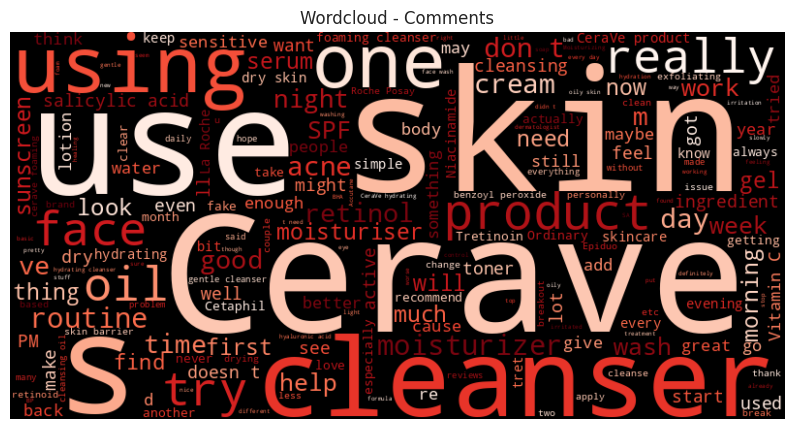

In [45]:
# Generate world cloud 
comments = ' '.join(comments['body'])
wordcloud1 = WordCloud(width=800, height=400, background_color='Black', colormap='Reds').generate(comments)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title('Wordcloud - Comments')
plt.axis('off');

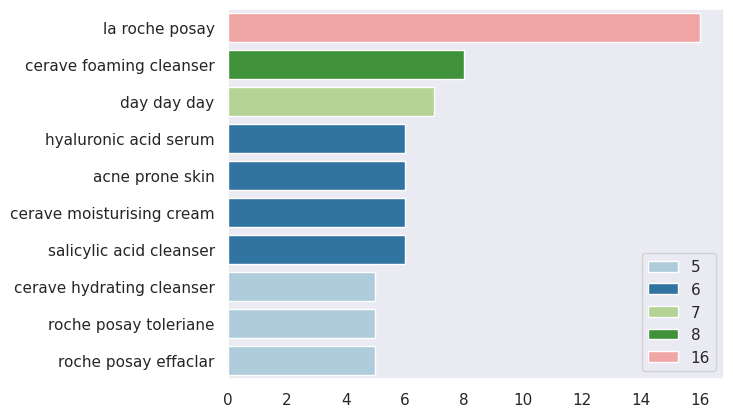

In [66]:
plot_top_ngrams_barchart(comments['body'], 3)

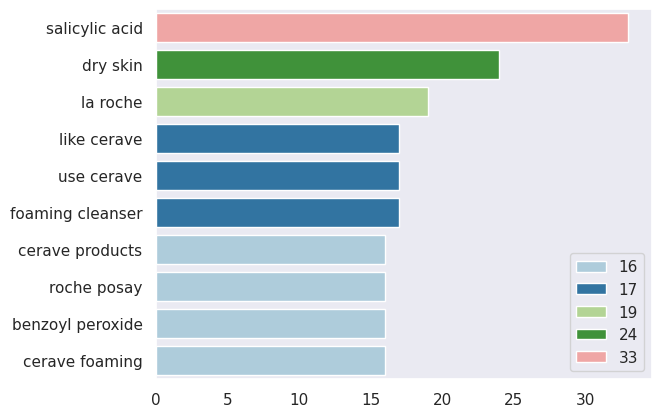

In [67]:
plot_top_ngrams_barchart(comments['body'], 2)